# Diamond Price & Quality Analysis

## Problem Context
Choosing a diamond involves balancing multiple quality characteristics against price.  
The objective of this project is to use data analysis and machine learning to identify diamonds that provide the best price-to-quality ratio.

The task is framed as a consulting-style analytical case.


In [1]:
!pip uninstall -y numpy


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [2]:
!pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
df.to_csv("diamonds.csv", index=False)

In [4]:
df_or = pd.read_csv("diamonds.csv")
df_or.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## Dataset Overview

- Dataset shape: (6,000 rows × 9 features)
- Target variable: Price

Features describe physical and qualitative attributes of diamonds, including carat, cut, color, clarity, and dimensions.


In [5]:
df_or.shape

(6000, 9)

## Exploratory Data Analysis (EDA)

This section explores relationships between diamond characteristics and price, identifying key drivers of value and potential non-linear patterns.


In [6]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   Carat Weight  6000 non-null   float64
 2   Cut           6000 non-null   object 
 3   Color         6000 non-null   object 
 4   Clarity       6000 non-null   object 
 5   Polish        6000 non-null   object 
 6   Symmetry      6000 non-null   object 
 7   Report        6000 non-null   object 
 8   Price         6000 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 422.0+ KB


In [7]:
df_or.isnull().sum()

ID              0
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [8]:
saved_ids = df["ID"]
X = df_or.drop(["ID", "Price"], axis = 1)
y = df_or["Price"]

## Data Preprocessing

Preprocessing steps included:
- Encoding categorical quality attributes
- Feature selection and transformation
- Train–validation split


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA
...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA
5996,1.00,Very Good,D,SI1,VG,VG,GIA
5997,1.02,Ideal,D,SI1,EX,EX,GIA
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA


In [11]:
y

0        5169
1        3470
2        3183
3        4370
4        3171
        ...  
5995     6250
5996     5328
5997     6157
5998    11206
5999    30507
Name: Price, Length: 6000, dtype: int64

In [12]:
contin = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry']
contin_2 = ['Report']
numeric = ['Carat Weight']

In [13]:
# encoding of Report feature
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
x_train_rep = ohe.fit_transform(X_train[contin_2])
x_test_rep = ohe.transform(X_test[contin_2])

In [14]:
# encoding of contin features

cut = ['Fair', 'Good', 'Very Good', 'Ideal', 'Signature-Ideal']
color = ["I", "H", "G", "F", "E", "D"]
clarity = ["SI1", "VS2", "VS1", "VVS2", "VVS1", "IF", "FL"]
polish = ["G", "VG", "EX", "ID"]
symm = ["G", "VG", "EX", "ID"]

ordinal_categories = [cut, color, clarity, polish, symm]

encoder = OrdinalEncoder(categories=ordinal_categories)

x_train_contin = encoder.fit_transform(X_train[contin])
x_test_contin = encoder.transform(X_test[contin])

In [15]:
df_or["Color"].value_counts()

Color
G    1501
H    1079
F    1013
I     968
E     778
D     661
Name: count, dtype: int64

In [16]:
df_or["Cut"].value_counts()

Cut
Ideal              2482
Very Good          2428
Good                708
Signature-Ideal     253
Fair                129
Name: count, dtype: int64

In [17]:
df_or["Clarity"].value_counts()

Clarity
SI1     2059
VS2     1575
VS1     1192
VVS2     666
VVS1     285
IF       219
FL         4
Name: count, dtype: int64

In [18]:
df_or["Polish"].value_counts()

Polish
EX    2425
VG    2409
ID     595
G      571
Name: count, dtype: int64

In [19]:
df_or["Symmetry"].value_counts()

Symmetry
VG    2417
EX    2059
G      916
ID     608
Name: count, dtype: int64

In [20]:
import pandas as pd

x_train_rep = pd.DataFrame(x_train_rep, columns=ohe.get_feature_names_out(contin_2), index=X_train.index)
x_test_rep = pd.DataFrame(x_test_rep, columns=ohe.get_feature_names_out(contin_2), index=X_test.index)

In [21]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
x_train_num_sc = sc.fit_transform(X_train[numeric])
x_val_num_sc = sc.transform(X_test[numeric])

In [22]:
x_train_scaled_df = pd.DataFrame(x_train_num_sc, columns=numeric, index=X_train.index)
x_val_scaled_df = pd.DataFrame(x_val_num_sc, columns=numeric, index=X_test.index)

In [23]:
x_train_contin = pd.DataFrame(x_train_contin, columns=contin, index=X_train.index) 
x_test_contin = pd.DataFrame(x_test_contin, columns=contin, index=X_test.index) 

X_train_final = pd.concat([x_train_scaled_df, x_train_rep, x_train_contin], axis=1)
X_test_final = pd.concat([x_val_scaled_df, x_test_rep, x_test_contin], axis=1)

## Price Prediction Model

A Random Forest regression model was trained to estimate diamond prices based on quality attributes.

Tree-based models were chosen due to their ability to capture complex interactions between features.


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train_final, y_train)

y_pred_train = rf.predict(X_train_final)
y_pred_val = rf.predict(X_test_final)

r2_train = r2_score(y_train, y_pred_train)
r2_val   = r2_score(y_test, y_pred_val)

print("Training R2:", r2_train)
print("Validation R2:", r2_val)

Training R2: 0.9968063069182009
Validation R2: 0.984750163934907


As I mentioned earlier, I will now make feature importance table to learn more about the value each feature has on defining the price. 

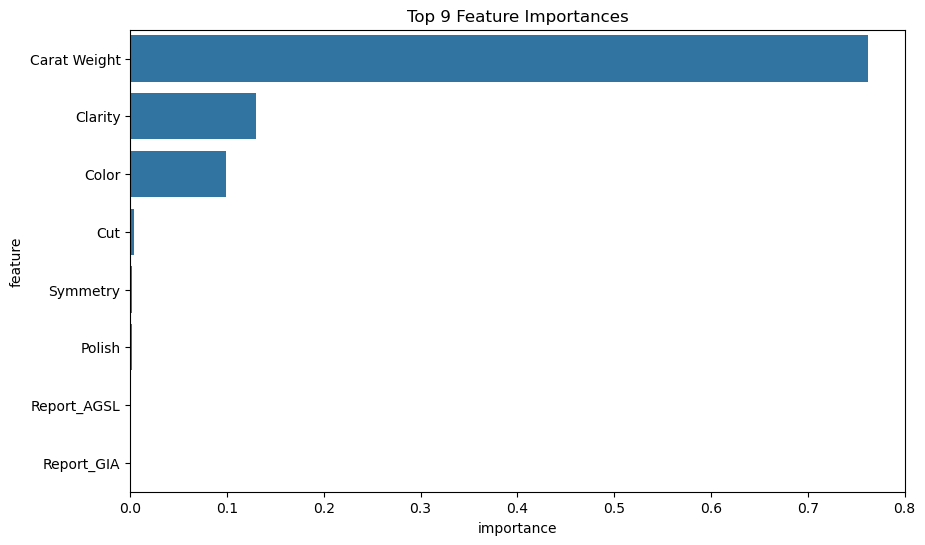

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.DataFrame({'feature': X_train_final.columns, 'importance': rf.feature_importances_})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp.head(9))
plt.title('Top 9 Feature Importances')
plt.show()


What we see from this feature importance - **Carat Weight, Clarity, Color, Cut** had biggest importance among all features. Moreover, it is crystal clear that **Carat Weight** is the one feature that had biggest influence with _importance (almost) = 0.8_ and **Clarity and Color** with importances in the range of _[0.1, 0.2]_.

Now, on training data, I added back IDs, price and appended predicted price and difference between price and predicted price. This is needed to select best ID at the end. We output the best 10 diamonds.

Since we need to also look up the predicted price and actual price and see what is a good choice and what is not, we will need to find difference between predicted price and actual price.

In [26]:
fin_ps = X_train_final.copy()
fin_ps['Price'] = y_train.values
fin_ps['predicted price'] = y_pred_train
fin_ps['ID'] = saved_ids.loc[X_train.index]

best_values = fin_ps.sort_values("predicted price", ascending=False).head(10)
best_values

,Carat Weight,Report_AGSL,Report_GIA,Cut,Color,Clarity,Polish,Symmetry,Price,predicted price,ID
3192,2.813559,0.0,1.0,3.0,5.0,5.0,2.0,2.0,101561,91706.020000,3193
4670,2.813559,0.0,1.0,3.0,5.0,3.0,2.0,2.0,77033,79170.200000,4671
4401,2.305085,0.0,1.0,2.0,5.0,5.0,1.0,1.0,83145,75603.580000,4402
4257,1.525424,0.0,1.0,4.0,5.0,6.0,2.0,2.0,81399,74807.167500,4258
46,1.949153,0.0,1.0,3.0,5.0,5.0,1.0,2.0,73209,69750.812833,47
5633,2.084746,0.0,1.0,3.0,5.0,5.0,2.0,2.0,72195,69357.947500,5634
3681,2.694915,0.0,1.0,3.0,4.0,3.0,2.0,1.0,65488,67475.150000,3682
4468,1.576271,1.0,0.0,3.0,5.0,5.0,3.0,3.0,67810,66690.635000,4469
1663,2.288136,0.0,1.0,3.0,5.0,4.0,2.0,2.0,67382,66376.560000,1664
5083,1.525424,0.0,1.0,3.0,5.0,5.0,2.0,1.0,66822,64383.026667,5084


In [27]:
fin_ps['diff'] = fin_ps['Price'] - fin_ps['predicted price']

In [30]:
table2 = fin_ps.sort_values("diff", ascending=True).head(10)
table2

,Carat Weight,Report_AGSL,Report_GIA,Cut,Color,Clarity,Polish,Symmetry,Price,predicted price,ID,diff
2504,2.203390,0.0,1.0,3.0,3.0,4.0,2.0,2.0,47843,51408.350000,2505,-3565.350000
4364,1.864407,0.0,1.0,3.0,3.0,3.0,2.0,2.0,34225,37721.100000,4365,-3496.100000
5408,1.610169,0.0,1.0,2.0,5.0,2.0,2.0,1.0,29094,32579.542500,5409,-3485.542500
5191,2.796610,0.0,1.0,3.0,2.0,1.0,2.0,2.0,40910,43962.930000,5192,-3052.930000
2592,2.067797,0.0,1.0,2.0,5.0,5.0,1.0,1.0,59415,62388.270000,2593,-2973.270000
936,1.491525,0.0,1.0,1.0,5.0,2.0,0.0,0.0,30095,32987.004167,937,-2892.004167
1641,1.474576,0.0,1.0,2.0,1.0,0.0,2.0,2.0,8803,11674.760833,1642,-2871.760833
3479,0.661017,0.0,1.0,3.0,5.0,5.0,2.0,1.0,24715,27527.240000,3480,-2812.240000
2203,1.983051,0.0,1.0,3.0,5.0,3.0,1.0,2.0,54845,57604.960000,2204,-2759.960000
3753,2.067797,0.0,1.0,2.0,3.0,3.0,1.0,1.0,43471,46229.390000,3754,-2758.390000


Now, based on table1, **I would recommend the diamond with ID = 2505 as it is the best option for Greg**. The reason is because while its price is _47843_, our predicted value for price was _51408_, which is almost _-3565 difference_, highlighting how undervalued this diamond is.
As it was mentioned earlier in the description of a task, the main focus is to "подобрать качественный камень по цене ниже его реальной стоимости". Thus, the main target is the price of diamond and we are looking for the most profitable choice. Moreover, this diamond also has good characteristics which support our choice.


From feature importance graph, we determined the features that have highest importance values. The most important was **Carat Weight** ~ [0.77], which in the diamond with ID: 2505 is **2.2** and we know that biggest carat weight is 3.0. This is a good weight for the diamond. 
The **Clarity and Color** were also the features with highest importance values within a range of [0.1, 0.2]. The **clarity** of this diamond is excellent with a value of 4 or VS2. The **color** is also not bad - G, almost colorless. 
Talking about other features, we have for **Cut** also good characteristics - Very good. The **Report** feature almost had no impact while for **Polish and Symmetry** we also have good characteristics. 


**Thus, the best choice is the diamond with ID: 2505.**

In [29]:
max_carat = fin_ps['Carat Weight'].max()
print(f"Maximum Carat Weight: {max_carat}")

Maximum Carat Weight: 3.016949152542373
